# Predict the Music Genre

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

# Reading Dataset

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,NaN,Major,0.046404,143.78799999999998,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,Scale A,0.174655,-13.716,Male,?,0.039949,?,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.01799999999999,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,?,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.18299999999999,Band,0.074412,Classical


In [4]:
df.shape

(15681, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15681 entries, 0 to 15680
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instance_id        15681 non-null  object 
 1   track_name         15681 non-null  object 
 2   popularity         15039 non-null  float64
 3   acousticness       15681 non-null  float64
 4   danceability       15125 non-null  float64
 5   duration_ms        15587 non-null  float64
 6   energy             15587 non-null  float64
 7   instrumentalness   15586 non-null  float64
 8   key                15681 non-null  object 
 9   liveness           15681 non-null  float64
 10  loudness           15645 non-null  float64
 11  voice_gender       14916 non-null  object 
 12  mode               15646 non-null  object 
 13  speechiness        15655 non-null  float64
 14  tempo              15681 non-null  object 
 15  musician_category  14321 non-null  object 
 16  valence            150

In [6]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,15039.000000,15681.000000,15125.000000,1.558700e+04,15587.000000,15586.000000,15681.000000,15645.000000,15655.000000,15004.000000
mean,50.822720,0.446922,0.570106,2.480008e+05,0.426977,0.264290,0.194089,-11.621471,0.096411,0.451400
std,17.679789,0.416981,0.215045,1.568312e+05,0.514145,0.395788,0.160291,8.663364,0.105647,0.277220
min,0.000000,0.000002,0.063962,-1.000000e+00,-1.000000,0.000000,0.016652,-50.054000,0.023858,0.000000
25%,39.017000,0.044521,0.418635,1.860163e+05,0.158277,0.000000,0.101674,-15.504000,0.039549,0.212242
50%,54.109000,0.295272,0.586114,2.362127e+05,0.560389,0.000719,0.128784,-8.611000,0.050425,0.432478
75%,63.449000,0.929001,0.733073,2.975593e+05,0.791881,0.638930,0.228973,-5.715000,0.094230,0.665369
max,108.512000,1.094410,1.072089,3.410383e+06,1.094853,1.078601,1.080959,1.389000,1.000445,1.076971


# Looking for Null Values

<AxesSubplot:>

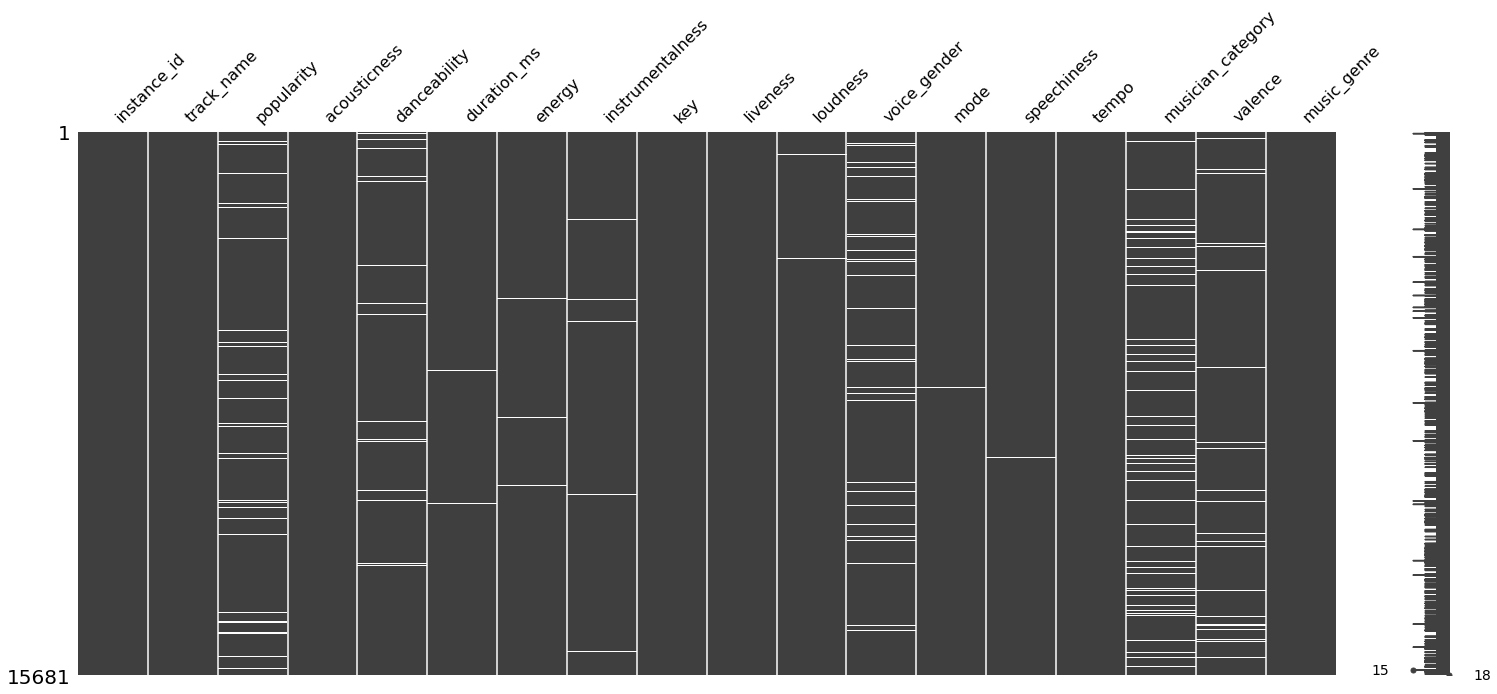

In [7]:
import missingno as m
m.matrix(df)

# Missing values in percentages(%)

In [8]:
df.isnull().mean()*100

instance_id          0.000000
track_name           0.000000
popularity           4.094127
acousticness         0.000000
danceability         3.545692
duration_ms          0.599452
energy               0.599452
instrumentalness     0.605829
key                  0.000000
liveness             0.000000
loudness             0.229577
voice_gender         4.878515
mode                 0.223200
speechiness          0.165806
tempo                0.000000
musician_category    8.672916
valence              4.317327
music_genre          0.000000
dtype: float64

#### musician_category, valence, voice_gender,danceability ,popularity  has most number of missing values

### Lets deal with the null values 

In [9]:
df[['popularity','danceability','voice_gender','musician_category','valence']]

,popularity,danceability,voice_gender,musician_category,valence
0,49.178,0.580508,NaN,Band,0.598965
1,59.827,0.687542,Male,Band,0.357194
2,89.023,0.967948,Female,Band,0.635525
3,55.762,0.616287,Both,Duet,0.983750
4,45.095,0.280645,Female,Band,0.074412
...,...,...,...,...,...
15676,0.000,0.387476,Female,Band,0.624518
15677,40.514,0.459917,Both,Duet,0.609022
15678,35.082,0.566619,Female,NaN,0.869294
15679,59.693,0.644554,Both,Duet,0.402700


## for Popularity

In [10]:
df.popularity.max()

108.512

In [11]:
df.popularity.min()

0.0

In [12]:
df.popularity.mean()

50.822720327149405

## Basic Plots

C:\Users\KIIT\Anaconda3\envs\python 36 with tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='popularity'>

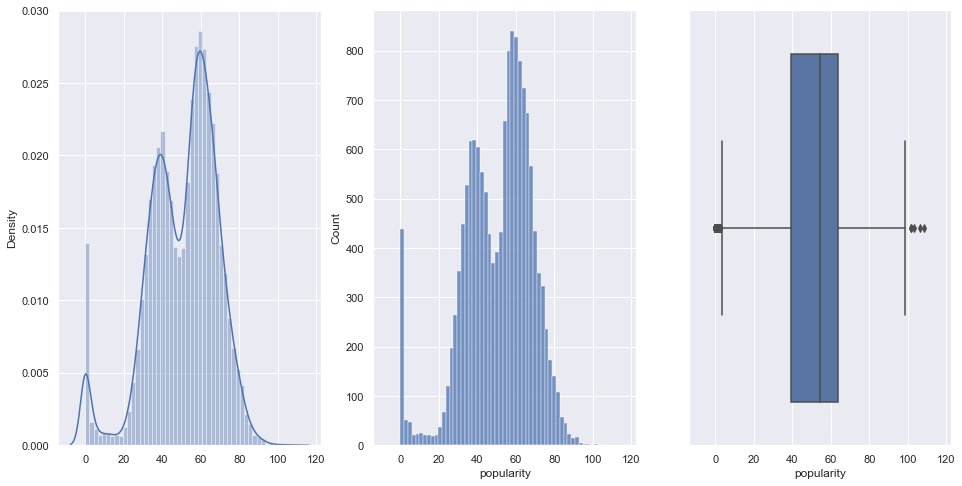

In [13]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(16,8))
sns.distplot(ax=axes[0],x=df.popularity)
sns.histplot(ax=axes[1],x=df.popularity)
sns.boxplot(ax=axes[2],x=df.popularity)

#### As we can see from th diagram, we can easily take the mean value for filling the null values as it dosent have outliars 

### Replacing the Null with mean value

In [14]:
df.popularity.fillna(value=df.popularity.mean(), inplace = True)

# danceability

In [15]:
df.danceability.min()

0.06396191584982698

In [16]:
df.danceability.max()

1.0720891360319904

In [17]:
df.danceability.mean()

0.5701058631606808

C:\Users\KIIT\Anaconda3\envs\python 36 with tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='danceability'>

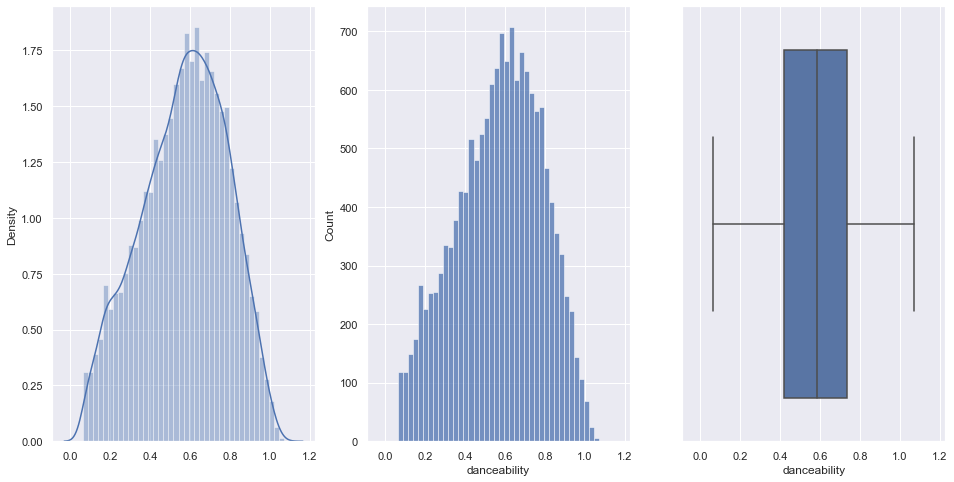

In [18]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(16,8))
sns.distplot(ax=axes[0],x=df.danceability)
sns.histplot(ax=axes[1],x=df.danceability)
sns.boxplot(ax=axes[2],x=df.danceability)

#### As we can see from th diagram, we can easily take the mean value for filling the null values as it dosent have outliars

In [19]:
df.danceability.fillna(value=df.danceability.mean(), inplace = True)

# valence

In [20]:
df.valence.min()

0.0

In [21]:
df.valence.max()

1.0769710183120615

In [22]:
df.valence.mean()

0.4514004383771466

In [23]:
df.valence.median()

0.43247797200121607

C:\Users\KIIT\Anaconda3\envs\python 36 with tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valence'>

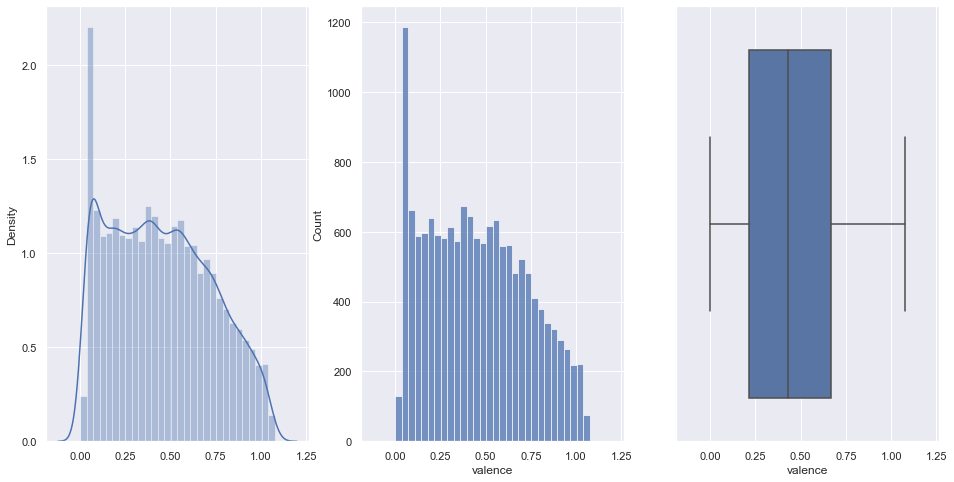

In [24]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(16,8))
sns.distplot(ax=axes[0],x=df.valence)
sns.histplot(ax=axes[1],x=df.valence)
sns.boxplot(ax=axes[2],x=df.valence)

#### As we can see from th diagram, we can easily take the median value for filling the null values as it dosent have outliars

In [25]:
df.valence.fillna(value=df.valence.median(), inplace = True)

### Tempo column is a float, but the date type is string, and it has "?" many time, so I have replaced "?" with 0, convert it into float and checked the mean and median 

In [26]:
df.tempo=df.tempo.replace("?",0)

In [27]:
df['tempo'] = pd.to_numeric(df['tempo'])

In [28]:
df.tempo.mean()

104.58094094764364

In [29]:
df.tempo.median()

107.469

### As mean and median is almost same so we can keep it

# Now Lets deal with the Categorical Null Variable 

In [30]:
df[['voice_gender','musician_category']]

,voice_gender,musician_category
0,NaN,Band
1,Male,Band
2,Female,Band
3,Both,Duet
4,Female,Band
...,...,...
15676,Female,Band
15677,Both,Duet
15678,Female,NaN
15679,Both,Duet


In [31]:
df.voice_gender.unique()

array([nan, 'Male', 'Female', 'Both'], dtype=object)

In [32]:
df.voice_gender.value_counts()

Female    5050
Male      4953
Both      4913
Name: voice_gender, dtype: int64

In [33]:
df.musician_category.unique()

array(['Band', 'Duet', 'Solo', nan], dtype=object)

In [34]:
df.musician_category.value_counts()

Band    4843
Solo    4784
Duet    4694
Name: musician_category, dtype: int64

### Lets address the Null or NAN values with "Others" Categoty

In [35]:
df.voice_gender.fillna("Others",inplace =True)

In [36]:
df.musician_category.fillna("Others",inplace =True)

<AxesSubplot:xlabel='musician_category', ylabel='count'>

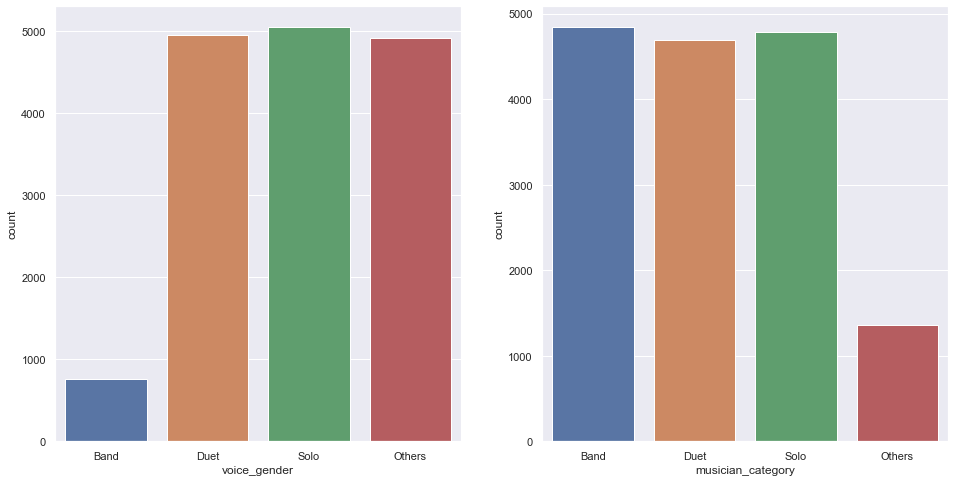

In [37]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16,8))
sns.countplot(ax=axes[0],x=df.voice_gender)
sns.countplot(ax=axes[1],x=df.musician_category)


In [38]:
df.isnull().sum()

instance_id           0
track_name            0
popularity            0
acousticness          0
danceability          0
duration_ms          94
energy               94
instrumentalness     95
key                   0
liveness              0
loudness             36
voice_gender          0
mode                 35
speechiness          26
tempo                 0
musician_category     0
valence               0
music_genre           0
dtype: int64

# Dropping all the other null values 

In [39]:
df.dropna(inplace=True)

<AxesSubplot:>

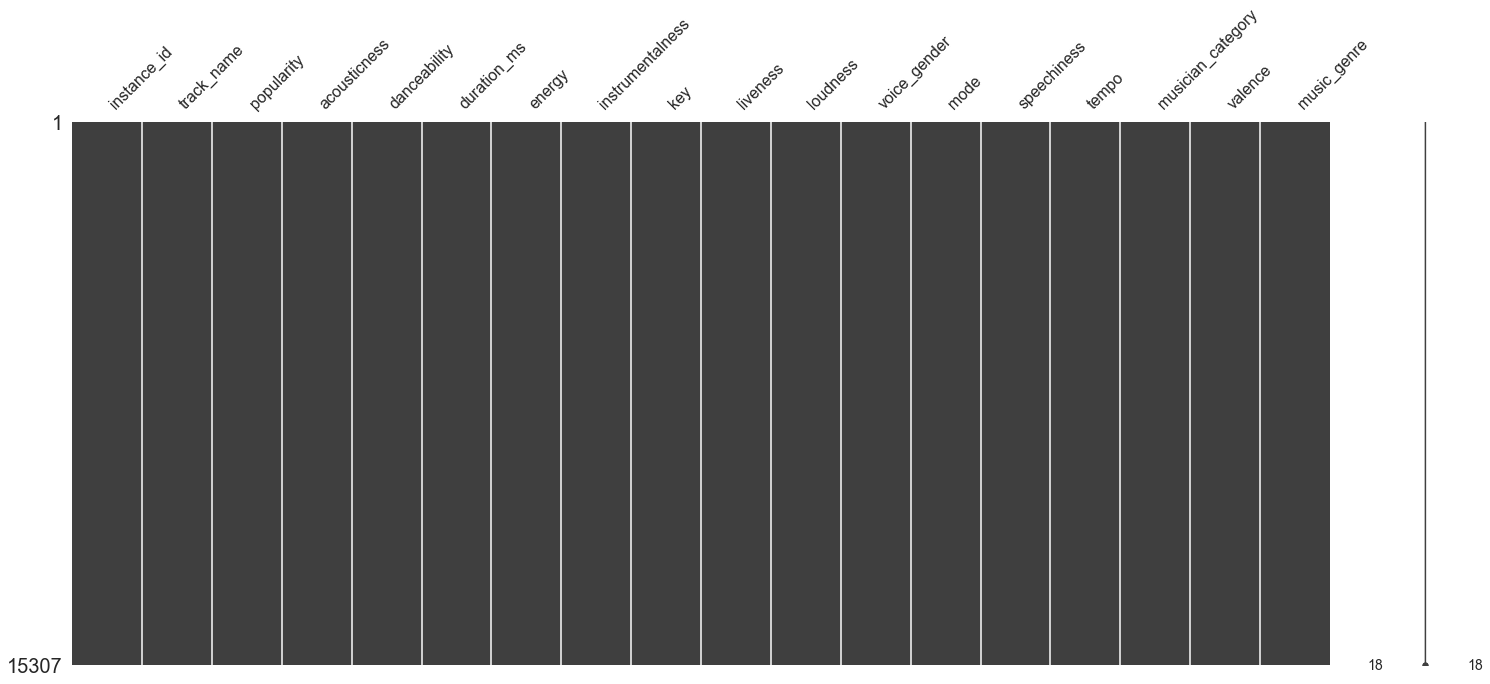

In [40]:
m.matrix(df)

# Repleating the same data preprocessing streps for the test set

AxesSubplot(0.125,0.125;0.698618x0.755)
instance_id          0.000000
track_name           0.000000
popularity           4.233614
acousticness         0.000000
danceability         3.545014
duration_ms          0.535578
energy               0.841622
instrumentalness     0.586585
key                  0.000000
liveness             0.000000
loudness             0.076511
voice_gender         4.743688
mode                 0.357052
speechiness          0.178526
tempo                0.000000
musician_category    7.957154
valence              4.871206
dtype: float64
   popularity  danceability voice_gender musician_category   valence
0      26.101      0.115490         Both              Duet  0.041238
1      66.325      0.592838         Male              Band  0.456309
2      71.871      0.510340       Female              Solo  0.193332
3      56.151      0.338336       Female              Solo  0.214906
4      43.687      0.773904         Both              Duet  0.757347
5      56.297      0.

C:\Users\KIIT\Anaconda3\envs\python 36 with tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KIIT\Anaconda3\envs\python 36 with tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KIIT\Anaconda3\envs\python 36 with tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

<AxesSubplot:>

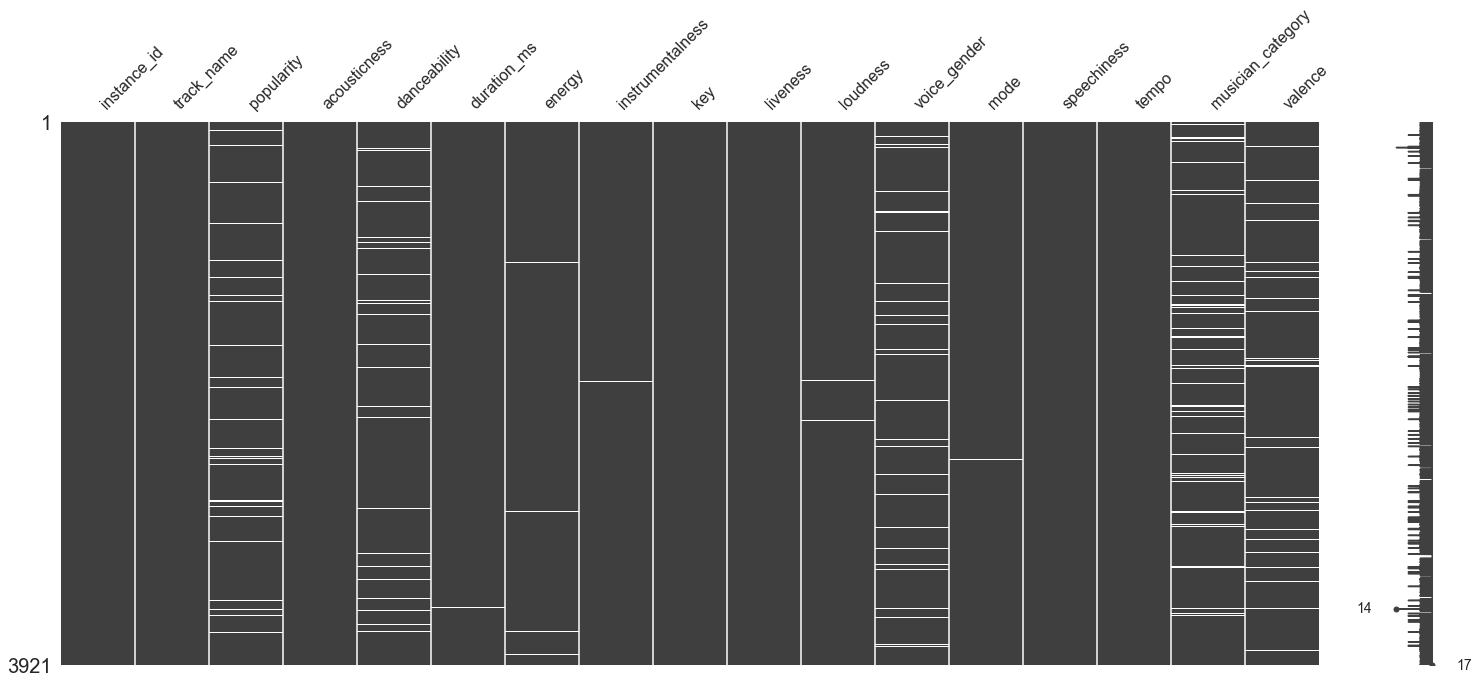

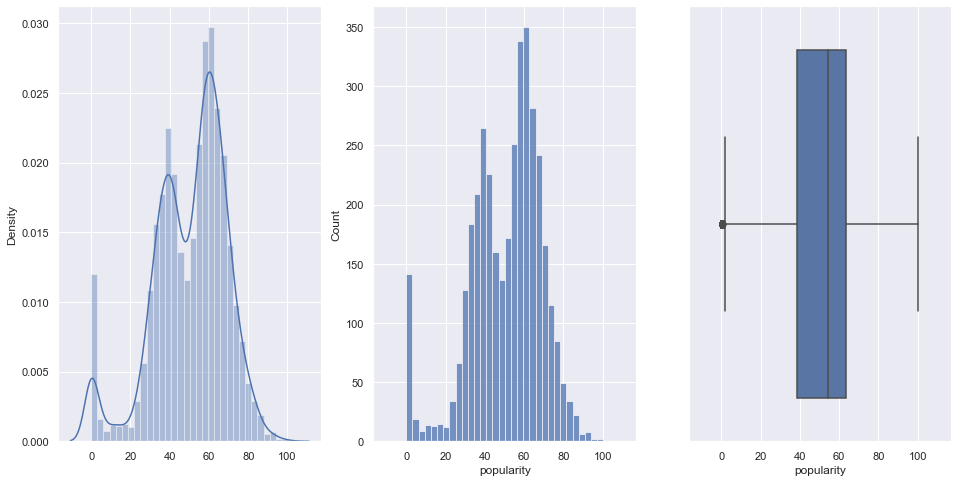

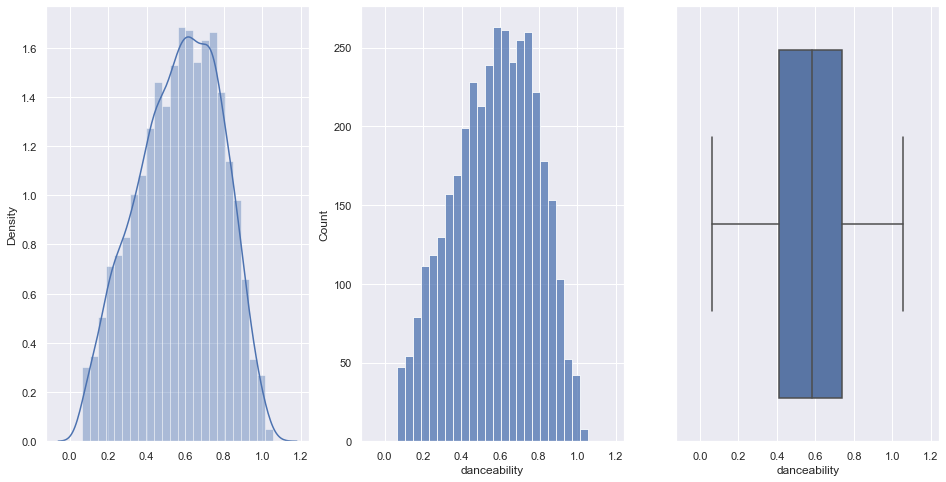

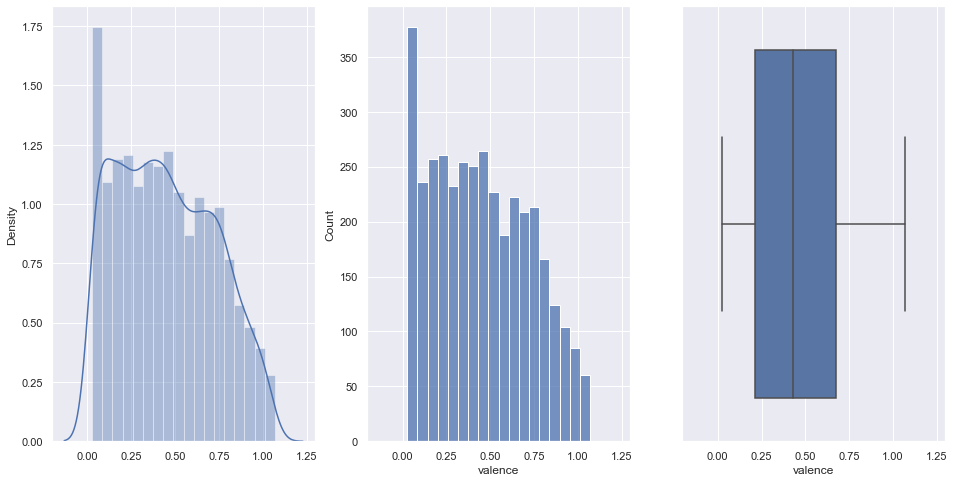

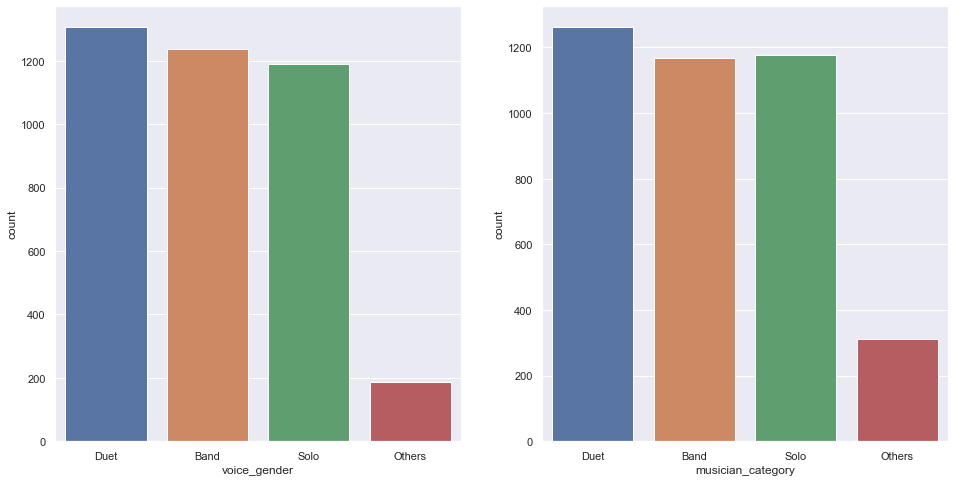

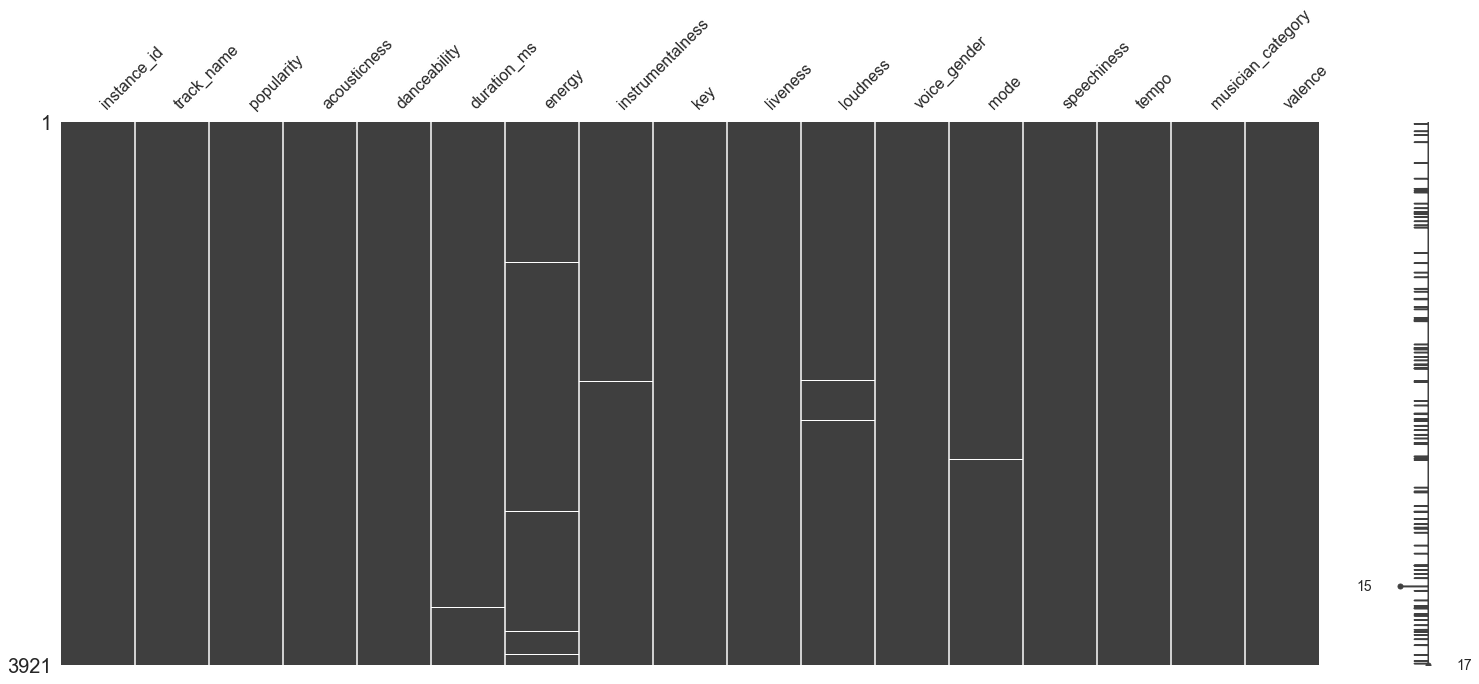

In [41]:
df_test = pd.read_csv("test.csv")

print(m.matrix(df_test))

print(df_test.isnull().mean()*100)

print(df_test[['popularity','danceability','voice_gender','musician_category','valence']].head(10))

fig, axes = plt.subplots(1, 3, sharex=True, figsize=(16,8))
sns.distplot(ax=axes[0],x=df_test.popularity)
sns.histplot(ax=axes[1],x=df_test.popularity)
sns.boxplot(ax=axes[2],x=df_test.popularity)


fig, axes = plt.subplots(1, 3, sharex=True, figsize=(16,8))
sns.distplot(ax=axes[0],x=df_test.danceability)
sns.histplot(ax=axes[1],x=df_test.danceability)
sns.boxplot(ax=axes[2],x=df_test.danceability)

fig, axes = plt.subplots(1, 3, sharex=True, figsize=(16,8))
sns.distplot(ax=axes[0],x=df_test.valence)
sns.histplot(ax=axes[1],x=df_test.valence)
sns.boxplot(ax=axes[2],x=df_test.valence)


df_test.popularity.fillna(value=df_test.popularity.mean(), inplace = True)
df_test.danceability.fillna(value=df_test.danceability.mean(), inplace = True)
df_test.valence.fillna(value=df_test.valence.mean(), inplace = True)

#Categorical Data for Test Dataset

df_test[['voice_gender','musician_category']].head()

df_test.voice_gender.fillna("Others",inplace =True)
df_test.musician_category.fillna("Others",inplace =True)

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16,8))
sns.countplot(ax=axes[0],x=df_test.voice_gender)
sns.countplot(ax=axes[1],x=df_test.musician_category)


df_test.tempo=df_test.tempo.replace("?",0)
df_test['tempo'] = pd.to_numeric(df_test['tempo'])

df_test.tempo.mean()
df_test.tempo.median()

#df_test.dropna(inplace=True)
m.matrix(df_test)

In [42]:
df.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,Others,Major,0.046404,143.788,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,Scale A,0.174655,-13.716,Male,?,0.039949,0.000,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.018,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,0.000,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.183,Band,0.074412,Classical


In [43]:
df_test.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence
0,MSC_70753.0,"Bard, a Man of Lake-town - Extended Version",26.101,0.823765,0.115490,211462.287,0.125325,0.945272,Scale A Sharp,0.120392,-25.541,Both,Minor,0.038657,80.777,Duet,0.041238
1,MSC_24064.0,New Kings,66.325,0.015441,0.592838,249151.238,0.870798,0.000108,Scale E,0.406722,-3.905,Male,?,0.051368,76.004,Band,0.456309
2,MSC_22731.0,Silver Lining,71.871,0.001006,0.510340,215693.240,0.683077,0.000000,Scale C,0.084608,-6.825,Female,Major,0.034303,144.458,Solo,0.193332
3,MSC_32095.0,A Tale That Wasn't Right,56.151,0.315650,0.338336,307056.179,0.608904,0.000000,Scale A,0.276811,-8.382,Female,Minor,0.036934,118.145,Solo,0.214906
4,MSC_24198.0,Get Ready,43.687,0.038336,0.773904,352802.872,0.955500,0.000007,Scale D,0.301726,-4.733,Both,Major,0.079688,95.012,Duet,0.757347


# Now Our data set is ready for preprocessing 

### Dealing with all the categorical variable

In [44]:
df[['key','voice_gender','mode','musician_category']]

,key,voice_gender,mode,musician_category
0,Scale E,Others,Major,Band
1,Scale A,Male,?,Band
2,Scale D,Female,Major,Band
3,Scale D,Both,Major,Duet
4,Scale F Sharp,Female,Minor,Band
...,...,...,...,...
15676,Scale B,Female,Major,Band
15677,Scale F,Both,Major,Duet
15678,Scale D Sharp,Female,Major,Others
15679,Scale F,Both,Minor,Duet


<AxesSubplot:xlabel='musician_category', ylabel='count'>

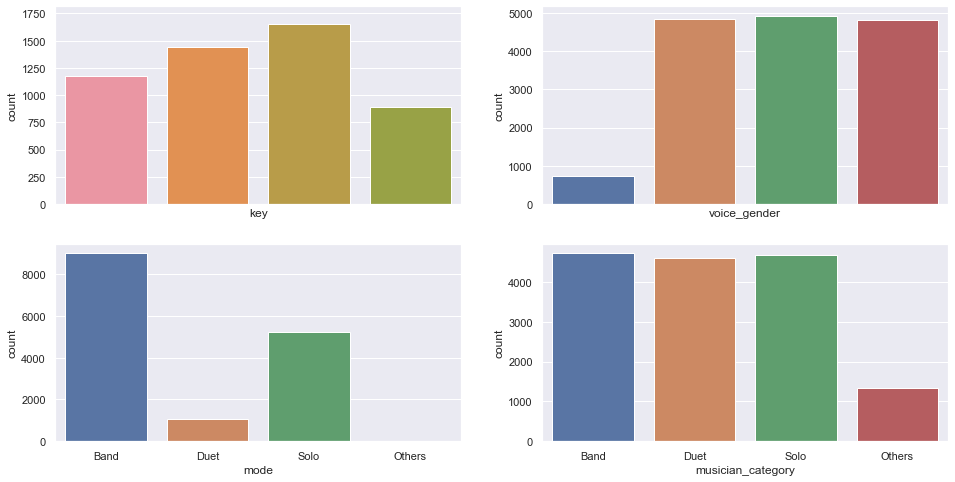

In [45]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(16,8))
sns.countplot(ax=axes[0,0],x=df.key)
sns.countplot(ax=axes[0,1],x=df.voice_gender)
sns.countplot(ax=axes[1,0],x=df['mode'])
sns.countplot(ax=axes[1,1],x=df.musician_category)

# Using label Encoder

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['key'] = le.fit_transform(df['key'])
df['voice_gender'] = le.fit_transform(df['voice_gender'])
df['mode'] = le.fit_transform(df['mode'])
df['musician_category'] = le.fit_transform(df['musician_category'])


In [47]:
df.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,7,0.147134,-14.140,3,1,0.046404,143.788,0,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,0,0.174655,-13.716,2,0,0.039949,0.000,0,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,5,0.042030,-4.995,1,1,0.119917,105.018,0,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,5,0.124637,-4.262,0,1,0.167493,0.000,1,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,9,0.134782,-26.922,1,2,0.039139,112.183,0,0.074412,Classical


### For test dataset their are some NAN mode values, that are replaced my others

In [48]:
df_test['mode'].fillna("others", inplace=True)

# Dropping useless columns from train dataset

In [49]:
df.drop(columns=['instance_id','track_name'], inplace=True)

# Repeating the same for the Test dataset

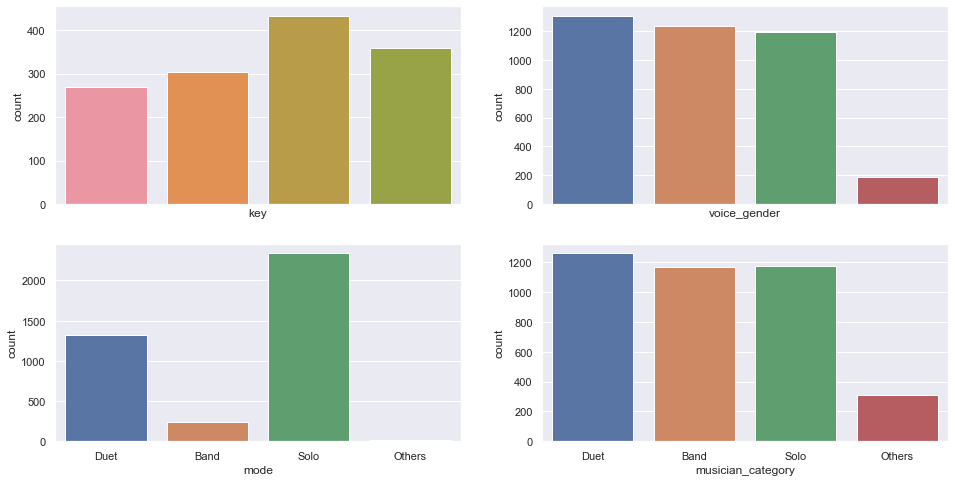

In [50]:
df_test[['key','voice_gender','mode','musician_category']]

fig, axes = plt.subplots(2, 2, sharex=True, figsize=(16,8))
sns.countplot(ax=axes[0,0],x=df_test.key)
sns.countplot(ax=axes[0,1],x=df_test.voice_gender)
sns.countplot(ax=axes[1,0],x=df_test['mode'])
sns.countplot(ax=axes[1,1],x=df_test.musician_category)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_test['key'] = le.fit_transform(df_test['key'])
df_test['voice_gender'] = le.fit_transform(df_test['voice_gender'])
df_test['mode'] = le.fit_transform(df_test['mode'])
df_test['musician_category'] = le.fit_transform(df_test['musician_category'])




# Final Training and Test Dataset

In [51]:
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,7,0.147134,-14.140,3,1,0.046404,143.788,0,0.598965,Jazz
1,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,0,0.174655,-13.716,2,0,0.039949,0.000,0,0.357194,Jazz
2,89.023,0.020041,0.967948,273314.723,0.857411,0.000000,5,0.042030,-4.995,1,1,0.119917,105.018,0,0.635525,Rap
3,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,5,0.124637,-4.262,0,1,0.167493,0.000,1,0.983750,Rock
4,45.095,0.858769,0.280645,410136.987,0.114732,0.002753,9,0.134782,-26.922,1,2,0.039139,112.183,0,0.074412,Classical


In [52]:
df_test.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence
0,MSC_70753.0,"Bard, a Man of Lake-town - Extended Version",26.101,0.823765,0.115490,211462.287,0.125325,0.945272,1,0.120392,-25.541,0,2,0.038657,80.777,1,0.041238
1,MSC_24064.0,New Kings,66.325,0.015441,0.592838,249151.238,0.870798,0.000108,7,0.406722,-3.905,2,0,0.051368,76.004,0,0.456309
2,MSC_22731.0,Silver Lining,71.871,0.001006,0.510340,215693.240,0.683077,0.000000,3,0.084608,-6.825,1,1,0.034303,144.458,3,0.193332
3,MSC_32095.0,A Tale That Wasn't Right,56.151,0.315650,0.338336,307056.179,0.608904,0.000000,0,0.276811,-8.382,1,2,0.036934,118.145,3,0.214906
4,MSC_24198.0,Get Ready,43.687,0.038336,0.773904,352802.872,0.955500,0.000007,5,0.301726,-4.733,0,1,0.079688,95.012,1,0.757347


# Checking for data imbalance 

In [53]:
df.music_genre.unique()

array(['Jazz', 'Rap', 'Rock', 'Classical', 'Electronic', 'Country',
       'Hip-Hop'], dtype=object)

In [54]:
df.music_genre.value_counts()

Classical     3906
Rock          3778
Rap           3124
Jazz          2783
Country        667
Electronic     599
Hip-Hop        450
Name: music_genre, dtype: int64

C:\Users\KIIT\Anaconda3\envs\python 36 with tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='music_genre', ylabel='count'>

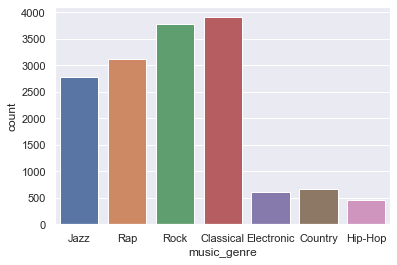

In [55]:
sns.countplot(df.music_genre)

### As we can see the Rock, Rap and Jazz genre is high and others are significantly low, so the data imbalance is clear

# X and Y Split

In [56]:
X=df[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'voice_gender',
       'mode', 'speechiness', 'tempo', 'musician_category', 'valence']]
y=df.music_genre

In [57]:
X

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence
0,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,7,0.147134,-14.140,3,1,0.046404,143.788,0,0.598965
1,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,0,0.174655,-13.716,2,0,0.039949,0.000,0,0.357194
2,89.023,0.020041,0.967948,273314.723,0.857411,0.000000,5,0.042030,-4.995,1,1,0.119917,105.018,0,0.635525
3,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,5,0.124637,-4.262,0,1,0.167493,0.000,1,0.983750
4,45.095,0.858769,0.280645,410136.987,0.114732,0.002753,9,0.134782,-26.922,1,2,0.039139,112.183,0,0.074412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15676,0.000,0.866988,0.387476,-1.000,0.196799,0.028725,2,0.248399,-16.331,1,1,0.045251,123.516,0,0.624518
15677,40.514,0.883333,0.459917,378128.464,0.349263,0.000519,8,0.681492,-25.087,0,1,0.448377,129.445,1,0.609022
15678,35.082,0.905281,0.566619,581799.061,0.543673,0.209238,6,0.416611,-10.246,1,1,0.040625,123.170,2,0.869294
15679,59.693,0.113408,0.644554,151226.592,0.912201,0.000089,8,0.166336,-7.257,0,2,0.060308,116.077,1,0.402700


In [58]:
y

0             Jazz
1             Jazz
2              Rap
3             Rock
4        Classical
           ...    
15676    Classical
15677         Jazz
15678         Jazz
15679         Rock
15680    Classical
Name: music_genre, Length: 15307, dtype: object

# Calling SMOTE

In [59]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_smote, y_smote = sm.fit_resample(X, y)

In [60]:
y_smote.value_counts()

Rap           3906
Jazz          3906
Country       3906
Hip-Hop       3906
Classical     3906
Rock          3906
Electronic    3906
Name: music_genre, dtype: int64

C:\Users\KIIT\Anaconda3\envs\python 36 with tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='music_genre', ylabel='count'>

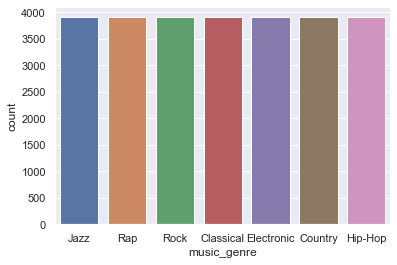

In [61]:
sns.countplot(y_smote)

# Now all the target variables are perfectly balanced 

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.25, random_state = 0)

In [63]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(20506, 15) (6836, 15)
(20506,) (6836,)


# Tried Recursive feature elimination but not helping it

model_xgb = xgb.XGBClassifier(max_depth=9,n_estimators= 100, learning_rate= 0.1,random_state=42, verbosity = 0)
from sklearn.feature_selection import RFE
rfe = RFE(model_xgb, 10)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

rfe.support_

col = X_train.columns[rfe.support_]

X_train.columns[~rfe.support_]

# Implementing Xgboost with grid search

In [65]:
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

import xgboost as xgb

# Looking for the best parameter by Grid Search 

In [65]:

%%time
parameters = {
    'max_depth': [3, 5, 7, 9], 
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1]
}

model_xgb = xgb.XGBClassifier(
    random_state=42, verbosity = 0
)

model_xgb = GridSearchCV(
    model_xgb, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_xgb.fit(X_train, y_train)
model_xgb_pred = model_xgb.predict(X_test)


Wall time: 29min 1s


In [66]:
cross_valid_scores = {}

In [67]:

from sklearn.model_selection import cross_val_score

print(f'Best parameters {model_xgb.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_xgb.best_score_:.3f}'
)
cross_valid_scores['xgboost'] = model_xgb.best_score_
print('-----')


Best parameters {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100}
Mean cross-validated accuracy score of the best_estimator: 0.810
-----


### Passing the best parameters in the model and calculating the final output 

In [66]:

model_xgb = xgb.XGBClassifier(max_depth=9,n_estimators= 100, learning_rate= 0.1,random_state=42, verbosity = 0)

model_xgb.fit(X_train, y_train)
model_xgb_pred = model_xgb.predict(X_test)

### Classification report

In [67]:
from sklearn.metrics import classification_report
print(classification_report(model_xgb_pred, y_test))

              precision    recall  f1-score   support

   Classical       0.91      0.92      0.92       958
     Country       0.88      0.88      0.88      1010
  Electronic       0.88      0.86      0.87      1007
     Hip-Hop       0.87      0.79      0.83      1053
        Jazz       0.72      0.79      0.76       880
         Rap       0.68      0.78      0.73       858
        Rock       0.82      0.73      0.77      1070

    accuracy                           0.82      6836
   macro avg       0.82      0.82      0.82      6836
weighted avg       0.83      0.82      0.82      6836



## Evaluation Score as per instruction

In [68]:
from sklearn.metrics import f1_score
score = 100*(f1_score(model_xgb_pred, y_test,average ='macro'))

In [69]:
score

82.0736307768758

In [70]:
y_test=y_test.values

In [71]:
print(np.concatenate((model_xgb_pred.reshape(len(model_xgb_pred),1), y_test.reshape(len(y_test),1)),1))

[['Country' 'Country']
 ['Rap' 'Rap']
 ['Rap' 'Electronic']
 ...
 ['Classical' 'Classical']
 ['Classical' 'Classical']
 ['Classical' 'Classical']]


# Confusion Matrix

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,model_xgb_pred)
print(cm)

[[884   9  12   0  49   1  16]
 [  1 886   8  10  27   7  69]
 [  5   9 864  19  64  10  16]
 [  0   5   6 832   3  91  16]
 [ 65  39 107   5 698   9  45]
 [  0  13   5 169   7 671 124]
 [  3  49   5  18  32  69 784]]


<AxesSubplot:>

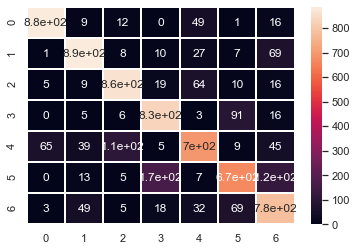

In [73]:
sns.heatmap(cm, annot=True, linewidth=1)

# reading the OG test dataset

In [74]:
og=pd.read_csv("test.csv")

In [75]:
og.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence
0,MSC_70753.0,"Bard, a Man of Lake-town - Extended Version",26.101,0.823765,0.115490,211462.287,0.125325,0.945272,Scale A Sharp,0.120392,-25.541,Both,Minor,0.038657,80.777,Duet,0.041238
1,MSC_24064.0,New Kings,66.325,0.015441,0.592838,249151.238,0.870798,0.000108,Scale E,0.406722,-3.905,Male,?,0.051368,76.00399999999999,Band,0.456309
2,MSC_22731.0,Silver Lining,71.871,0.001006,0.510340,215693.240,0.683077,0.000000,Scale C,0.084608,-6.825,Female,Major,0.034303,144.458,Solo,0.193332
3,MSC_32095.0,A Tale That Wasn't Right,56.151,0.315650,0.338336,307056.179,0.608904,0.000000,Scale A,0.276811,-8.382,Female,Minor,0.036934,118.145,Solo,0.214906
4,MSC_24198.0,Get Ready,43.687,0.038336,0.773904,352802.872,0.955500,0.000007,Scale D,0.301726,-4.733,Both,Major,0.079688,95.012,Duet,0.757347


# Test Dataset After Preprocessing

In [76]:
df_test.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence
0,MSC_70753.0,"Bard, a Man of Lake-town - Extended Version",26.101,0.823765,0.115490,211462.287,0.125325,0.945272,1,0.120392,-25.541,0,2,0.038657,80.777,1,0.041238
1,MSC_24064.0,New Kings,66.325,0.015441,0.592838,249151.238,0.870798,0.000108,7,0.406722,-3.905,2,0,0.051368,76.004,0,0.456309
2,MSC_22731.0,Silver Lining,71.871,0.001006,0.510340,215693.240,0.683077,0.000000,3,0.084608,-6.825,1,1,0.034303,144.458,3,0.193332
3,MSC_32095.0,A Tale That Wasn't Right,56.151,0.315650,0.338336,307056.179,0.608904,0.000000,0,0.276811,-8.382,1,2,0.036934,118.145,3,0.214906
4,MSC_24198.0,Get Ready,43.687,0.038336,0.773904,352802.872,0.955500,0.000007,5,0.301726,-4.733,0,1,0.079688,95.012,1,0.757347


# Storing the Ids into the new dataset

In [77]:
submit = pd.DataFrame()
submit['instance_id']=og['instance_id']

In [78]:
df_test.drop(columns=['instance_id','track_name'],inplace=True)

# Prediction for Test Set

## Passing the test dataset into our Xgboost model with the best hyperparameters

In [79]:
X_train.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'voice_gender',
       'mode', 'speechiness', 'tempo', 'musician_category', 'valence'],
      dtype='object')

In [80]:
df_test.shape

(3921, 15)

In [81]:
model_xgb_pred_final = model_xgb.predict(df_test)

In [82]:
model_xgb_pred_final

array(['Classical', 'Rock', 'Rock', ..., 'Classical', 'Country',
       'Electronic'], dtype=object)

# Storing the final values in the new dataset

In [83]:
submit['music_genre']= model_xgb_pred_final

# Storing it into a csv file for submission

In [84]:
submit.to_csv("submit.csv",index=False)

In [85]:
submit

,instance_id,music_genre
0,MSC_70753.0,Classical
1,MSC_24064.0,Rock
2,MSC_22731.0,Rock
3,MSC_32095.0,Rock
4,MSC_24198.0,Jazz
...,...,...
3916,MSC_80955.0,Classical
3917,MSC_72767.0,Rock
3918,MSC_40192.0,Classical
3919,MSC_56067.0,Country
